In [11]:
from skimage.io import imread, imshow, show, imsave
from scipy import ndimage, misc, signal, stats
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import timeit
import matplotlib.pyplot as plt
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.util import random_noise
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc

In [8]:
def plot_image(image, title='', sz=20, ax=False):
    plt.title(title, size=sz), plt.imshow(image)
    plt.axis(ax)

def calculate_2dft(input):
    ft = fp.ifftshift(input)
    ft = fp.fft2(ft)
    return fp.fftshift(ft)

def calculate_2dift(input):
    ift = fp.ifftshift(input)
    ift = fp.ifft2(ift)
    return fp.fftshift(ift).real

def readAsGray(path: str) -> np.ndarray:
    _im = imread(path)
    if len(_im.shape) == 2:
        return _im
    _im = rgba2rgb(_im) if _im.shape[2] > 3 else _im
    _im = rgb2gray(_im)
    return _im

def plot_hist(r, g, b, title='', sz=20):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=sz), pylab.ylabel('frequency', size=sz)
    pylab.title(title, size=sz)

def splitrgb(_im):
    return _im[...,0], _im[...,1], _im[...,2]

def mergergb(r,g,b):
    rgb = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
    rgb[...,0] = r
    rgb[...,1] = g
    rgb[...,2] = b
    return rgb

## BÀI 1

(<AxesSubplot: title={'center': 'Grayscale'}>, None)

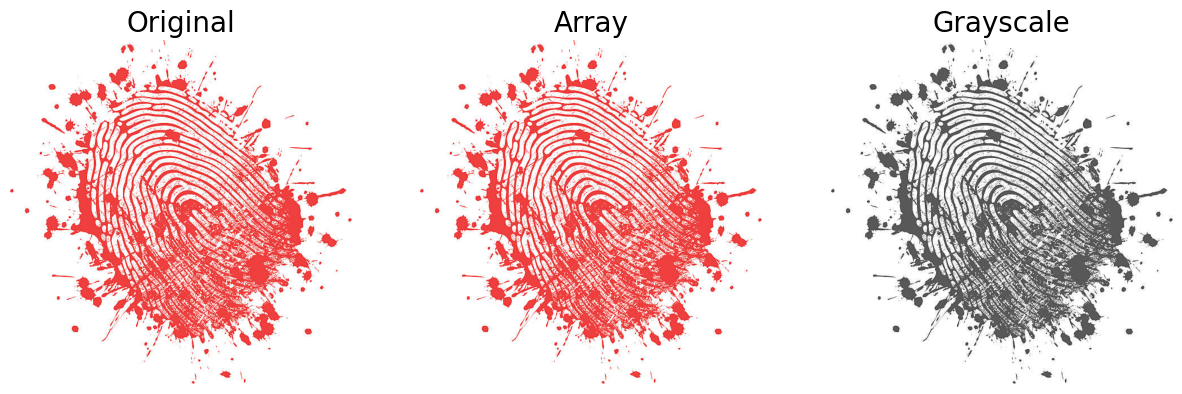

In [14]:
im = Image.open("../images/blood.jpg")

im1 = np.array(im)
plt.imsave("../images/bloodArr.jpg", im1)

im2 = im.convert("L")

plt.figure(figsize=(15,5))
plt.subplot(131), plot_image(im, "Original")
plt.subplot(132), plot_image(im1, "Array")
plt.gray()
plt.subplot(133), plot_image(im2, "Grayscale")

## BÀI 2

(<AxesSubplot: title={'center': 'Threshold image focus on red'}>, None)

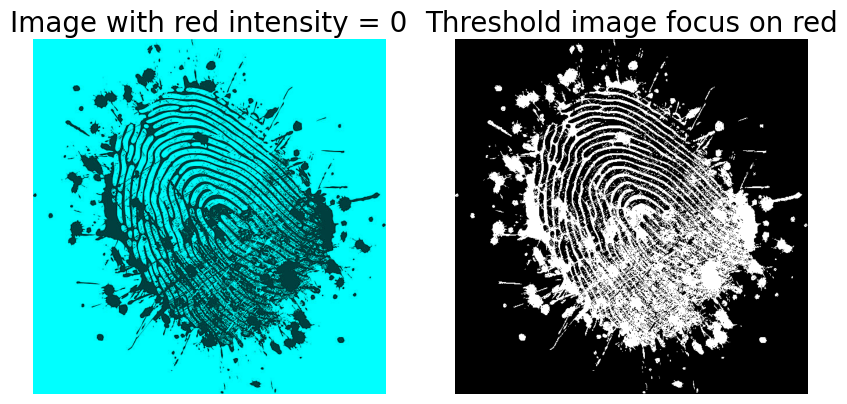

In [38]:
im = imread("../images/blood.jpg")
im[...,0] = 0
im1 = imread("../images/blood.jpg")
thresholdImg = np.zeros(shape = im1.shape)

fixed_threshold = 200
for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        thresholdImg[i][j] = 1 if im1[i][j][0] > fixed_threshold and im1[i][j][1] < fixed_threshold and im1[i][j][2] else 0

plt.figure(figsize=(10,5))
plt.subplot(121), plot_image(im, "Image with red intensity = 0")
plt.subplot(122), plot_image(thresholdImg, "Threshold image focus on red")

## BÀI 3

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


(<AxesSubplot: title={'center': 'fft convole kernel2'}>, None)

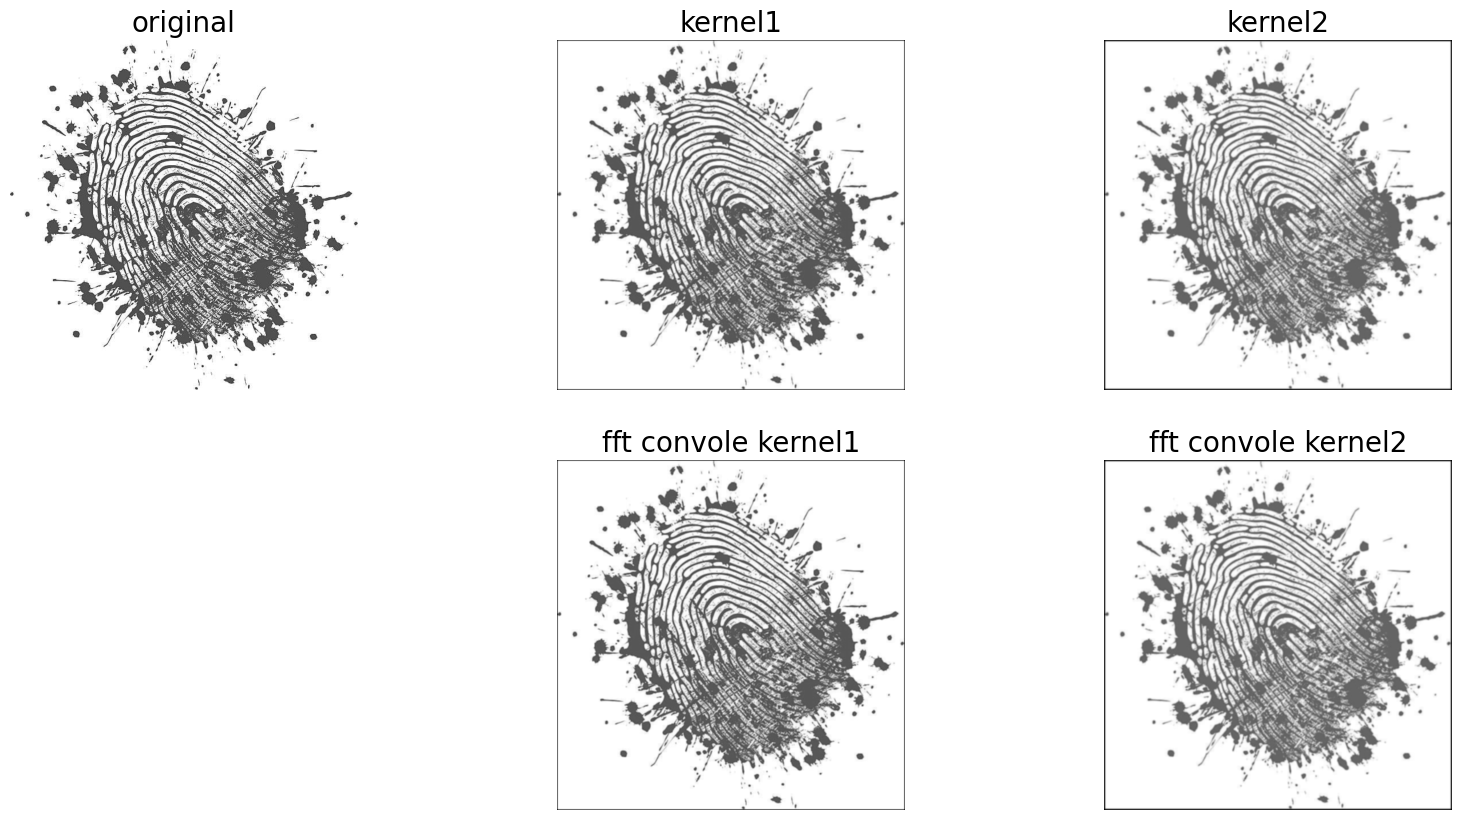

In [81]:
im = readAsGray("../images/blood.jpg")

kernel = np.array([[16,24,16],
                    [24,36,24],
                    [16,24,16]], dtype=float)

kernel = kernel / 256

kernel2 = np.pad(kernel,1)
for j in range(kernel2.shape[1]):
    kernel2[0,j] = kernel2[1,j]/4
    kernel2[4,j] = kernel2[3,j]/4
for j in range(kernel2.shape[0]):
    kernel2[j,0] = kernel2[j,1]/4
    kernel2[j,4] = kernel2[j,3]/4

print(kernel2)

im1 = signal.convolve2d(im, kernel)
im2 = signal.convolve2d(im, kernel2)
im3 = signal.fftconvolve(im, kernel)
im4 = signal.fftconvolve(im, kernel2)

plt.figure(figsize=(20,10))
plt.subplot(231), plot_image(im, "original")
plt.subplot(232), plot_image(im1, "kernel1")
plt.subplot(233), plot_image(im2, "kernel2")
plt.subplot(235), plot_image(im3, "fft convole kernel1")
plt.subplot(236), plot_image(im4, "fft convole kernel2")
